<table width="100%">
  <tr>
    <td width="50%" align="left">
      <img src="imgs/Brockmann_Consult_Logo_Horizontal_Tagline_1.1.png" alt="Company Logo" style="max-width: 100%; height: auto;" width="300">
    </td>
    <td width="50%" align="right">
      <img src="imgs/logo-light.png" alt="xcube logo" style="max-width: 100%; height: auto;" width="150">
    </td>
  </tr>
</table>

<table width="100%">
  <tr>
    <td width="100%" align="center">
      <h1 style="text-align: center; margin-bottom: 0.3em; font-weight: bold;">
        Access Monthly gap filled Ocean Colour Climate Change Initiative (OC-CCI) chlorophyll-a
      </h1>
      <div style="height: 0.5em;"></div>
      <h2 style="text-align: center; margin-top: 0; font-weight: bold;">
        Using xcube-zenodo
      </h2>
    </td>
  </tr>
</table>


**Author(s):** Clara Backens, Konstantin Ntokas, Pontus Lurcock  
**Affiliation:** Brockmann Consult GmbH  
**GitHub:** [xcube-zenodo](https://github.com/xcube-dev/xcube-zenodo)  
**Documentation:** [xcube-zenodo](https://github.com/xcube-dev/xcube-zenodo/blob/main/README.md)


---

## Introduction

This notebook demonstrates how to access the monthly **OC-CCI chlorophyll-a** dataset—published as a ZIP archive on Zenodo—using **xcube-zenodo**.

<div style="border: 2.5px solid #999; padding: 1em; border-radius: 6px; background-color: #eaeaea;">
  <strong>Objectives:</strong>
  <ul>
    <li>Gain an overview of how <code>xcube-zenodo</code> enables access to Zenodo-hosted datasets.</li>
    <li>Learn how to use the preload API for datasets that cannot be accessed lazily (e.g., ZIP-compressed archives).</li>
    <li>Explore the OC-CCI chlorophyll-a dataset and understand how to access it.</li>
  </ul>
</div>

> **Disclaimer**  
> This notebook demonstrates the use of open source software and is intended for educational and illustrative purposes only. All software used is subject to its respective licenses. The authors and contributors of this notebook make no guarantees about the accuracy, reliability, or suitability of the content or included code. Use at your own discretion and risk. No warranties are provided, either express or implied.


---

## Install the xcube-zenodo Data Store

The xcube-zenodo package is implemented as a **xcube plugin** and can be installed using `conda/mamba` from the conda-forge channel.

- 🐍 **Conda (conda-forge):** [xcube-zenodo on Anaconda](https://anaconda.org/conda-forge/xcube-zenodo) `conda install -c conda-forge xcube-zenodo`

  You can also use **Mamba** as a faster alternative to Conda: `mamba install -c conda-forge xcube-zenodo`

---

In [1]:
from xcube.core.store import new_data_store, get_data_store_params_schema

First, we initiate a zenodo data store for the record https://zenodo.org/records/17488521 with the record ID root="17488521".

In [2]:
store = new_data_store("zenodo", root="17488521")

We can list all the available datasets as shown below: 

In [3]:
store.list_data_ids()

['Ford_et_al_OC-CCI_chlor_a_gap_filled_1997_2024_0.25deg_v0-3.zip',
 'Ford_et_al_OC-CCI_chlor_a_gap_filled_1997_2024_1deg_v0-3.zip']

Compressed files can be preloaded using the `preload_data` method. In this demonstration, we preload the **1° resolution** dataset for faster processing. For the dataset shown later in the viewer, we used the **0.25° resolution** version.


In [4]:
%%time
cache_store = store.preload_data(
    'Ford_et_al_OC-CCI_chlor_a_gap_filled_1997_2024_1deg_v0-3.zip'
)

Data ID,Status,Progress,Message,Exception
Ford_et_al_OC-CCI_chlor_a_gap_filled_1997_2024_1deg_v0-3.zip,COMPLETED,-,Already preloaded,-


CPU times: user 10.7 ms, sys: 2.87 ms, total: 13.6 ms
Wall time: 36.7 ms


This process performs the following steps:

- Download the compressed file into the temporary directory `zenodo_temp`.
- Decompress the archive.
- Move the extracted data into the final storage location:
  - By default, this is the `zenodo_cache` directory, but it can be replaced with any file-system–based data store supported by xcube via the store configuration.
  - Optionally, the data can be converted into a different target format; get the `preload_data` parameters for available options with `store.get_preload_data_params_schema()`.

The `preload_data` method returns a data store instance which links to the cache storage.

In [5]:
cache_store.list_data_ids()

['Ford_et_al_OC-CCI_chlor_a_gap_filled_1997_2024_1deg_v0-3.nc']

In [6]:
ds = cache_store.open_data(
    "Ford_et_al_OC-CCI_chlor_a_gap_filled_1997_2024_1deg_v0-3.nc",
    chunks="auto",
)
ds

<xarray.Dataset> Size: 610MB
Dimensions:                    (longitude: 360, latitude: 180, time: 336)
Coordinates:
  * longitude                  (longitude) float32 1kB -179.5 -178.5 ... 179.5
  * latitude                   (latitude) float32 720B -89.5 -88.5 ... 88.5 89.5
  * time                       (time) datetime64[ns] 3kB 1997-01-15 ... 2024-...
Data variables:
    OC-CCI_chlor_a             (longitude, latitude, time) float32 87MB dask.array<chunksize=(360, 180, 336), meta=np.ndarray>
    OC-CCI_chlor_a_log10_rmsd  (longitude, latitude, time) float32 87MB dask.array<chunksize=(360, 180, 336), meta=np.ndarray>
    OSISAF_ice_conc            (longitude, latitude, time) float32 87MB dask.array<chunksize=(360, 180, 336), meta=np.ndarray>
    chl_filled                 (longitude, latitude, time) float32 87MB dask.array<chunksize=(360, 180, 336), meta=np.ndarray>
    chl_filled_unc             (longitude, latitude, time) float32 87MB dask.array<chunksize=(360, 180, 336), meta=np.ndarray>
    chl_flag                   (longitude, latitude, time) float32 87MB dask.array<chunksize=(360, 180, 336), meta=np.ndarray>
    chl_process                (time) float32 1kB dask.array<chunksize=(336,), meta=np.ndarray>
    flag_l                     (longitude, latitude, time) float32 87MB dask.array<chunksize=(360, 180, 336), meta=np.ndarray>
Attributes:
    date_file_generated:    03/10/2025 15:47
    code_by:                Daniel J. Ford (d.ford@exeter.ac.uk)
    start_year:             1997.0
    end_year:               2024.0
    supporting_manuscript:  Daniel J. Ford, Gemma Kulk, Shubha Sathyendranath...
    code_location:          https://github.com/JamieLab/SCOPE-ArgoChla
    averaging_code:         https://github.com/JamieLab/OceanICU

We now apply a few adjustments and perform a spatiotemporal subset so that the dataset conforms to the structure expected by the Viewer. Further we convert the data from log10 scale to absolute scale, as the Viewer supports both scalings internally. 

In [8]:
ds = ds.transpose("time", "latitude", "longitude")
ds = ds.chunk(dict(time=1, latitude=-1, longitude=-1))
ds = ds.sel(
    time=slice("2023-04-01", "2023-10-31"), 
    latitude=slice(52, 61), 
    longitude=slice(-4, 12),
)

ds["OC-CCI_chlor_a"] = 10**ds["OC-CCI_chlor_a"]
ds["chl_filled"] = 10**ds["chl_filled"]
ds

<xarray.Dataset> Size: 28kB
Dimensions:                    (time: 7, latitude: 9, longitude: 16)
Coordinates:
  * time                       (time) datetime64[ns] 56B 2023-04-15 ... 2023-...
  * latitude                   (latitude) float32 36B 52.5 53.5 ... 59.5 60.5
  * longitude                  (longitude) float32 64B -3.5 -2.5 ... 10.5 11.5
Data variables:
    OC-CCI_chlor_a             (time, latitude, longitude) float32 4kB dask.array<chunksize=(1, 9, 16), meta=np.ndarray>
    OC-CCI_chlor_a_log10_rmsd  (time, latitude, longitude) float32 4kB dask.array<chunksize=(1, 9, 16), meta=np.ndarray>
    OSISAF_ice_conc            (time, latitude, longitude) float32 4kB dask.array<chunksize=(1, 9, 16), meta=np.ndarray>
    chl_filled                 (time, latitude, longitude) float32 4kB dask.array<chunksize=(1, 9, 16), meta=np.ndarray>
    chl_filled_unc             (time, latitude, longitude) float32 4kB dask.array<chunksize=(1, 9, 16), meta=np.ndarray>
    chl_flag                   (time, latitude, longitude) float32 4kB dask.array<chunksize=(1, 9, 16), meta=np.ndarray>
    chl_process                (time) float32 28B dask.array<chunksize=(1,), meta=np.ndarray>
    flag_l                     (time, latitude, longitude) float32 4kB dask.array<chunksize=(1, 9, 16), meta=np.ndarray>
Attributes:
    date_file_generated:    03/10/2025 15:47
    code_by:                Daniel J. Ford (d.ford@exeter.ac.uk)
    start_year:             1997.0
    end_year:               2024.0
    supporting_manuscript:  Daniel J. Ford, Gemma Kulk, Shubha Sathyendranath...
    code_location:          https://github.com/JamieLab/SCOPE-ArgoChla
    averaging_code:         https://github.com/JamieLab/OceanICU

Next we can plot one time slice.

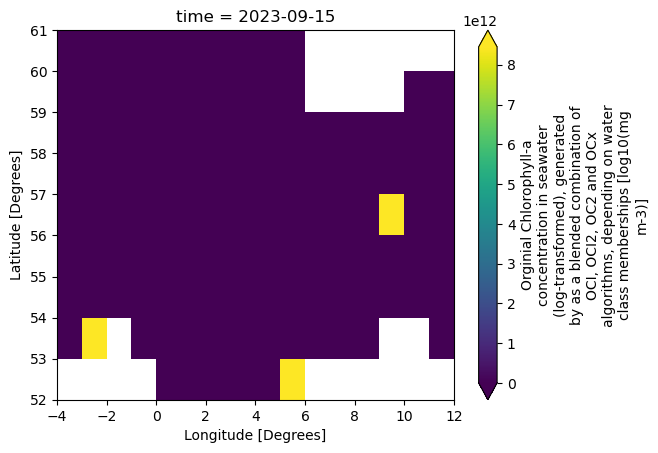

In [14]:
ds["OC-CCI_chlor_a"].isel(time=5).plot(robust=True)

Finally we can write the dataset to a storage. In this case we write it to a local file system. 

> Note!
> For the Viewer demonstration we wrote the dataset to a S3 AWS object storage.

In [10]:
store_storage = new_data_store("file", root="storage")

In [11]:
%%time
store_storage.write_data(ds,'oc_cci.zarr', replace=True)

CPU times: user 91.7 ms, sys: 287 ms, total: 379 ms
Wall time: 2.57 s


'oc_cci.zarr'

---

<table width="100%">
  <tr>
    </td>
    <td width="20%"></td>
    <td width="60%" align="center" style="font-size: 0.9em; color: #666; vertical-align: middle;">
      &copy; 2025 Brockmann Consult GmbH &nbsp;|&nbsp;
      <a href="https://www.brockmann-consult.de" target="_blank">Website</a>
    <td width="20%" align="right" style="vertical-align: middle;">
      <img src="imgs/Brockmann_Consult_Logo_Horizontal_1.1.png" alt="Company Logo" width="150">
    </td>
  </tr>
</table>